In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

In [ ]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

In [ ]:
# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model

In [ ]:
input_shape = 32, 32, 3
n_classes = 10
model = densenet(input_shape,n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 8, 8, 64)     0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 8, 8, 64)    256         ['max_pooling2d[0][0]']          
 alization)                                                                                   

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.700524 to fit



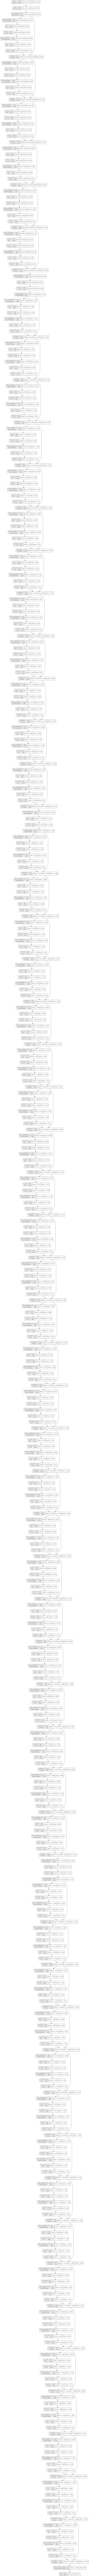

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 520s 325ms/step - loss: 1.6419 - accuracy: 0.4177
Epoch 2/50
1563/1563 [==============================] - 506s 324ms/step - loss: 1.1358 - accuracy: 0.5953
Epoch 3/50
1563/1563 [==============================] - 507s 324ms/step - loss: 0.9029 - accuracy: 0.6836
Epoch 4/50
1563/1563 [==============================] - 508s 325ms/step - loss: 0.7628 - accuracy: 0.7355
Epoch 5/50
1563/1563 [==============================] - 510s 327ms/step - loss: 0.6592 - accuracy: 0.7705
Epoch 6/50
1563/1563 [==============================] - 511s 327ms/step - loss: 0.5718 - accuracy: 0.7991
Epoch 7/50
1563/1563 [==============================] - 509s 325ms/step - loss: 0.4914 - accuracy: 0.8294
Epoch 8/50
1563/1563 [==============================] - 510s 326ms/step - loss: 0.4135 - accuracy: 0.8559
Epoch 9/50
1563/1563 [==============================] - 505s 323ms/step - loss: 0.3429 - accuracy: 0.8794
Epoch 10/50
1563/1563 [=======================

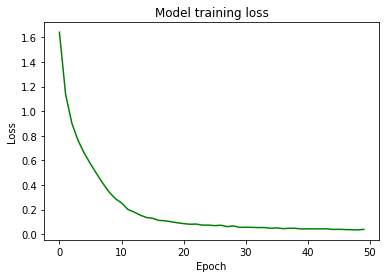

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'g')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

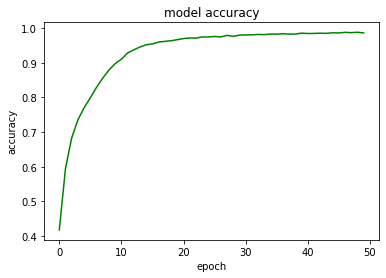

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()